ANN Clasificatoria con dataset dataset_186_satimage

In [10]:
# Funciones para el procesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()

In [20]:
data_origin = pd.read_csv(r'../3_Normalización/datasets/dataset_186_satimage.csv')
dataset = fit_cols(data_origin, data_origin.columns, Min_Max)
dataset = one_hot_cols(dataset, ['class'])
# dataset.head(20)
# dataset.describe()

In [46]:
X_train, X_test, Y_train, Y_test = split_Dataset(dataset, list(dataset.columns)[-6:])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(5144, 36) (5144, 6)
(1286, 36) (1286, 6)


In [47]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop



def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)



Adam=optimizers.Adam(lr=0.05)
Sgd=optimizers.SGD(lr=0.01)

In [48]:
def Model1():
    model = Sequential()
    model.add(Dense(20,input_dim=36,activation='relu'))
    model.add(Dense(15,activation='relu'))
    
    
    model.add(Dense(6,activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model



M=Model1()

Epoch 1/100
206/206 [==============================] - 0s 1ms/step - loss: 1.3555 - accuracy: 0.5305 - val_loss: 1.0471 - val_accuracy: 0.7185
Epoch 2/100
206/206 [==============================] - 0s 706us/step - loss: 0.8380 - accuracy: 0.7712 - val_loss: 0.6725 - val_accuracy: 0.8056
Epoch 3/100
206/206 [==============================] - 0s 720us/step - loss: 0.5977 - accuracy: 0.8108 - val_loss: 0.5335 - val_accuracy: 0.8289
Epoch 4/100
206/206 [==============================] - 0s 727us/step - loss: 0.5029 - accuracy: 0.8212 - val_loss: 0.4696 - val_accuracy: 0.8344
Epoch 5/100
206/206 [==============================] - 0s 698us/step - loss: 0.4648 - accuracy: 0.8248 - val_loss: 0.4430 - val_accuracy: 0.8336
Epoch 6/100
206/206 [==============================] - 0s 713us/step - loss: 0.4408 - accuracy: 0.8305 - val_loss: 0.4181 - val_accuracy: 0.8359
Epoch 7/100
206/206 [==============================] - 0s 706us/step - loss: 0.4280 - accuracy: 0.8340 - val_loss: 0.4079 - val_accu

206/206 [==============================] - 0s 693us/step - loss: 0.3158 - accuracy: 0.8711 - val_loss: 0.3021 - val_accuracy: 0.8694
Epoch 58/100
206/206 [==============================] - 0s 706us/step - loss: 0.3135 - accuracy: 0.8773 - val_loss: 0.3169 - val_accuracy: 0.8530
Epoch 59/100
206/206 [==============================] - 0s 684us/step - loss: 0.3155 - accuracy: 0.8721 - val_loss: 0.3033 - val_accuracy: 0.8740
Epoch 60/100
206/206 [==============================] - 0s 673us/step - loss: 0.3108 - accuracy: 0.8752 - val_loss: 0.2970 - val_accuracy: 0.8795
Epoch 61/100
206/206 [==============================] - 0s 678us/step - loss: 0.3108 - accuracy: 0.8793 - val_loss: 0.2937 - val_accuracy: 0.8834
Epoch 62/100
206/206 [==============================] - 0s 687us/step - loss: 0.3088 - accuracy: 0.8767 - val_loss: 0.2926 - val_accuracy: 0.8740
Epoch 63/100
206/206 [==============================] - 0s 694us/step - loss: 0.3081 - accuracy: 0.8787 - val_loss: 0.2988 - val_accuracy

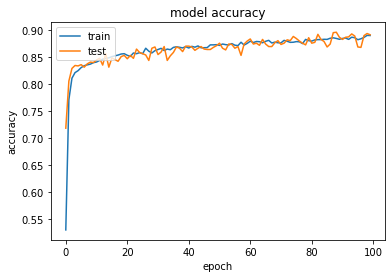

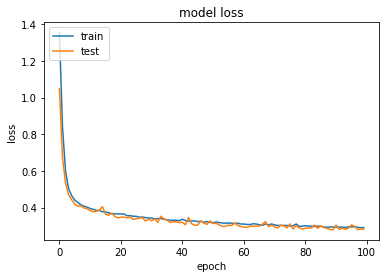

In [49]:
History=M.fit(X_train,Y_train,
              epochs=100,
              batch_size=25,
              validation_data=(X_test,Y_test))

Show_History(History)